# Exercise 1.1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib). These libraries can be installed using the ```pip``` command line tool. Alternatively you can install an python distribution like [Anaconda](https://www.continuum.io/downloads) or [Canopy](https://www.enthought.com/products/canopy/)  which have these and many other standard package pre-installed.

In [74]:
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
import numpy as np # linear algebra / matrices
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
class idict(dict):
    def __init__(self,*args,**kwargs) : dict.__init__(self,*args,**kwargs) 
    def __str__(self): return 'ImageDictionary'
    def __repr__(self): return 'ImageDictionary'

## Load Images
Make sure you extract the ```matlab.zip``` file to the same directory as this notebook so there is a ```data/``` directory (or fix the paths after the ```imread``` command

In [4]:
a=imread('data/scroll.tif')
b=imread('data/wood.tif')
c=imread('data/asphalt_gray.tif')

## Showing images

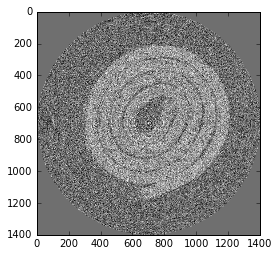

In [8]:
%matplotlib inline
# setup the plotting environment
plt.imshow(a, cmap = 'gray') # show a single image

### Subplots
Here we show multiple subplots within a single figure

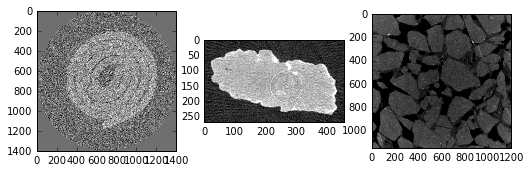

In [15]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,5))
ax1.imshow(a, cmap = 'gray')
ax2.imshow(b, cmap = 'gray')
ax3.imshow(c, cmap = 'gray')

## Compute SNR
We can compute the SNR by looking at the ratio of the mean to the standard deviation in a region that is supposed to be constant

$$ SNR = \frac{\mu_{img}}{\sigma_{img}} $$


SNR for A_1 is 2.79120835802


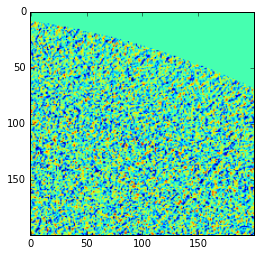

In [19]:
# Identify the region
x1 = 0
x2 = 200
y1 = 800
y2 = 1000

# extract a sub image
subA1=a[x1:x2,y1:y2];
snrA1=np.mean(subA1)/np.std(subA1) # compute the snr
print("SNR for A_1 is {}".format(snrA1))
plt.imshow(subA1)

## __Tasks__
1. Find a second region in a
1. Repeat the procedure with images b and c

# Exercise 1.2
## Load the phantom image
The ```np.mean``` command with the argument 2 averages across the 2 dimension (0 is x, 1 is y, 2 is color) for these images

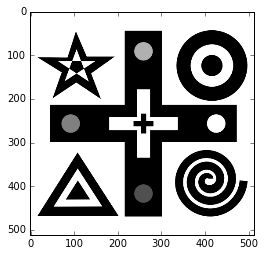

In [24]:
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray')

## Create noisy image
Change the scale values so the plot is correct, you can either adjust the slider values below or call the function yourself

ImageDictionary

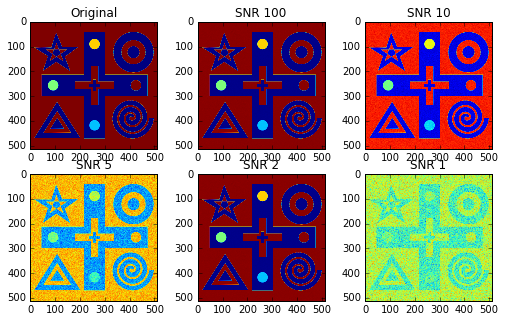

In [75]:
from numpy.random import randn

def show_noisy_images(scale_100, scale_10, scale_5, scale_2, scale_1):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(8.5,5))
    ax1.imshow(d)
    ax1.set_title('Original')

    d_snr100=d+scale_100*randn(*d.shape);
    ax2.imshow(d_snr100)
    ax2.set_title('SNR 100')


    d_snr10=d+scale_10*randn(*d.shape);
    ax3.imshow(d_snr10)
    ax3.set_title('SNR 10')

    scale = 100 
    d_snr5=d+scale_5*randn(*d.shape);
    ax4.imshow(d_snr5)
    ax4.set_title('SNR 5')

    scale = 1000 
    d_snr2=d+scale_2*randn(*d.shape);
    ax5.imshow(d_snr100)
    ax5.set_title('SNR 2')

    scale = 5000 
    d_snr1=d+scale_1*randn(*d.shape);
    ax6.imshow(d_snr1)
    ax6.set_title('SNR 1')
    return idict({1: d_snr1, 2: d_snr2, 5: d_snr5, 10: d_snr10, 100: d_snr100})
noisy_images = interactive(show_noisy_images, scale_100 = (0.0,1.0), scale_10 = (0.0,10.0), scale_5 = (0.0,50.0), scale_2 = (0.0,100.0), scale_1 = (0.0,200.0))
display(noisy_images)

# Filter the images
You can read about the standard filters in scipy by looking at the documentation in http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.filters alternatively more (different) filters are available using OpenCV for the more advanced students

## Uniform Filters
The specific documentation on the filter is as below
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.uniform_filter.html#scipy.ndimage.filters.uniform_filter


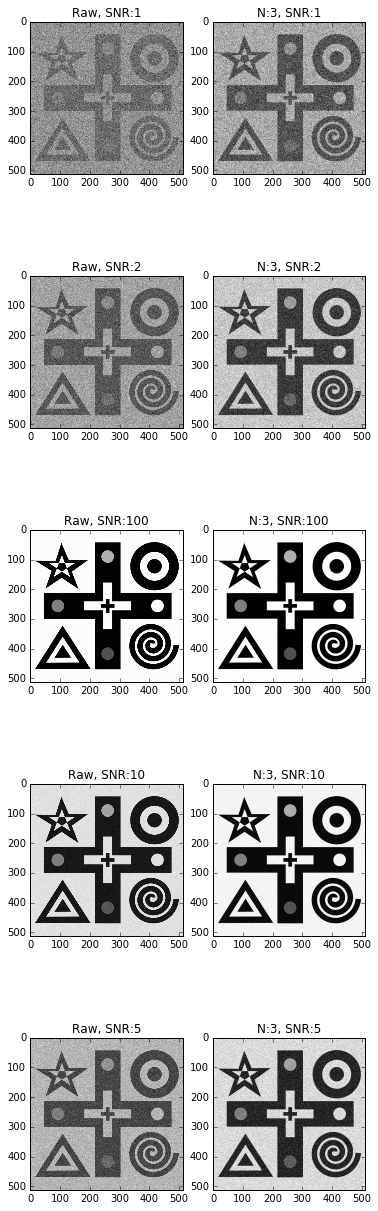

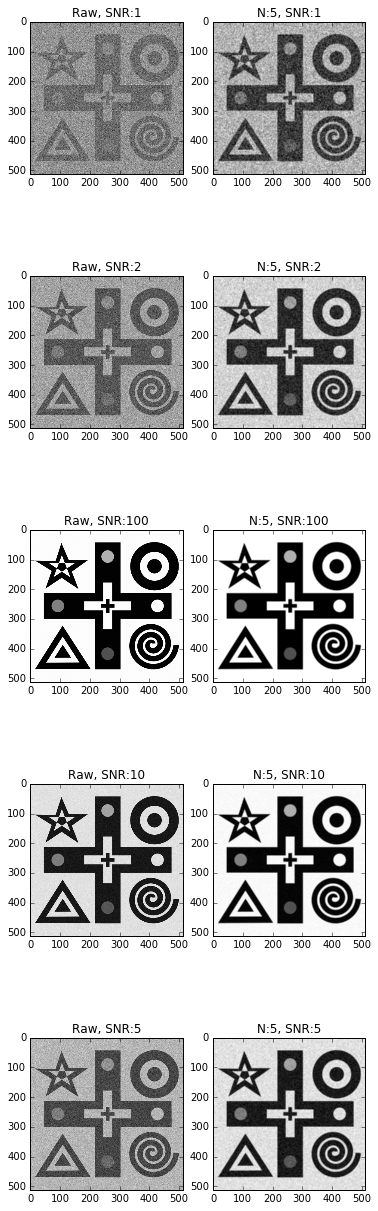

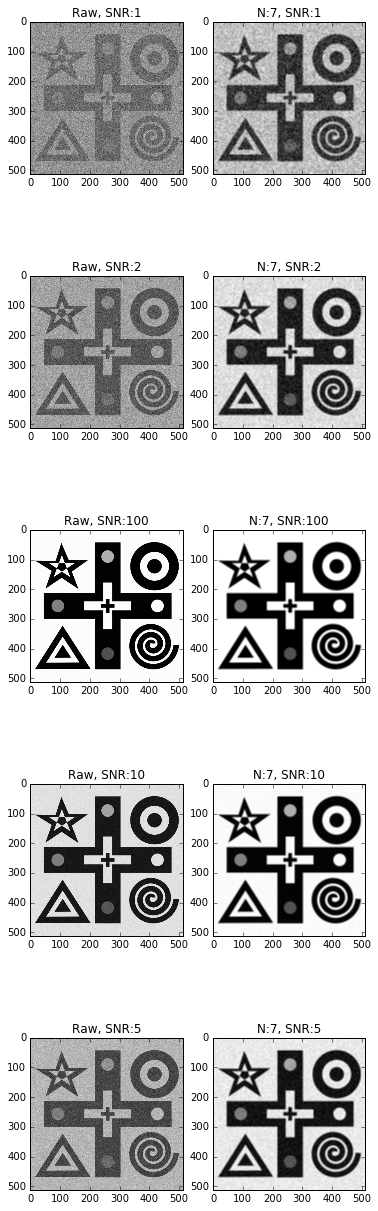

In [103]:
from scipy.ndimage.filters import uniform_filter
# Size of the filter window
N=[3,5,7];
# Images
noisy_image_list = noisy_images.result
for i,filter_size in enumerate(N):
    fig, all_axes = plt.subplots(5, 2, figsize=(6,22))
    for ((snr,img),(ax1,ax2)) in zip(noisy_image_list.iteritems(),all_axes):
        ax1.imshow(img, cmap='gray')
        ax1.set_title("Raw, SNR:{}".format(snr))
        ax2.imshow(uniform_filter(img,filter_size), cmap='gray')
        ax2.set_title("N:{}, SNR:{}".format(filter_size,snr))

## Median Filter
The median filter function can be found here, complete the same exercise as before using this instead
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.median_filter.html#scipy.ndimage.filters.median_filter

In [ ]:
# insert your code here

The rest of the exercise as Matlab code, look at the functions in _scipy_ and _skimage_ to finish the execises 

```
%% Exercise 3.1

% Select different number of levels and wavelet types (eg coif, sym, db)
wname = 'sym6'; lev =2;

% Select different noise images or even experiment images
[c,s] = wavedec2(d_snr10,lev,wname);

% Estimate the noise standard deviation from the
% detail coefficients at level 1.
det1 = detcoef2('compact',c,s,1);
sigma = median(abs(det1))/0.6745;

% Use wbmpen for selecting global threshold  
% for image de-noising.
alpha = 1.2;
thr = wbmpen(c,1,sigma,alpha);

% Use wdencmp for de-noising the image using the above
% thresholds with soft thresholding and approximation kept.
keepapp = 1;
% Select threshold type 'h' or 's'
tt='s';
xd = wdencmp('gbl',c,s,wname,lev,thr,tt,keepapp);

figure(5)

ax5(1)=subplot(1,2,1); imagesc(d_snr10), axis image, title('Original')
ax5(2)=subplot(1,2,2); imagesc(xd), axis image, title(['Wavelet filtered with ' num2str(lev) ' levels of ' wname ])

linkaxes(ax5);

%% Exercise 3.2 Diffusion filter

addpath 'diffusion/'

% Tune the filter parameters for the three experiment images
lambda=1000;
sigma=1;
m=8;
stepsize=0.25;
steps=10;
y=nldif(a,lambda,sigma,m,stepsize,steps);

figure(6)

ax6(1)=subplot(1,2,1); imagesc(a), axis image, title('Original')
ax6(2)=subplot(1,2,2); imagesc(y), axis image, title('Nonlin diffusion')

linkaxes(ax5);

%% Exercise 4 Test run

% in separate file exercise4.m
```